## zipline installation

Please follow latest instructions [here](https://www.zipline.io/install.html)

It is recommended to install Zipline in an isolated conda environment. Installing Zipline in conda environments will not interfere your default Python deployment or site-packages, which will prevent any possible conflict with your global libraries.

Use the `environment.yml`in this directory to install `zipline` and dependencies in a separate `conda` environment.

```
conda env create -f environment.yml
```

The environment has been created on Ubuntu; if your receive errors while creating this environment on Mac OS or Windows, just delete the problematic packages. We'll put up multiple enviroment files in due course.

To circumvent a bug that causes `zipline` to request S&P500 benchmark data from a deprecated API, replace the `benchmarks.py` in your `zipline` installation in the `env_zipline` environment just created with the version in this directory. This will use `pandas-datareader` to access the benchmark data via the FRED data portal provided by the Federal Reserve as described in this chapter.

To identify the location of your `zipline` installation, run 
```
import zipline
zipline.__file__
```
and then got to the `data` folder where you'll find the `benchmarks.py` file.

## Ingest Data

Get QUANDL API key and follow instructions to download zipline bundles [here](http://www.zipline.io/bundles.html).

## Imports

In [1]:
# !conda install -c conda-forge wrapt -n env_zipline -y

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from zipline.api import order_target, record, symbol
from zipline.examples import buyapple

In [3]:
%load_ext zipline
%matplotlib inline
sns.set_style('whitegrid')

## zipline Demo

Zipline is the algorithmic trading library that powers the Quantopian backtesting and live-trading platform. It is also available offline to develop a strategy using a limited number of free data bundles that can be ingested and used to test the performance of trading ideas before porting the result to the online Quantopian platform for paper and live trading.

### Data access using zipline

See `zipline` [docs](http://www.zipline.io/bundles.html) on the download and management of data bundles used to simulate backtests. 

The following commandline instruction lists the available bundles (store per default in `~/.zipline`. 

In [4]:
# !zipline bundles

The following code illustrates how zipline permits us to access daily stock data for a range of companies. You can run zipline scripts in the Jupyter Notebook using the magic function of the same name.

First, you need to initialize the context with the desired security symbols. We'll also use a counter variable. Then zipline calls handle_data, where we use the `data.history()` method to look back a single period and append the data for the last day to a .csv file:

In [5]:
# !zipline ingest

In [6]:
%%zipline --start 2010-1-1 --end 2018-1-1 --data-frequency daily
from zipline.api import order_target, record, symbol
import pandas as pd

def initialize(context):
    context.i = 0
    context.assets = [symbol('FB'), symbol('GOOG'), symbol('AMZN')]
    
def handle_data(context, data):
    df = data.history(context.assets, fields=['price', 'volume'], bar_count=1, frequency="1d")
    df = df.to_frame().reset_index()
    
    if context.i == 0:
        df.columns = ['date', 'asset', 'price', 'volume']
        df.to_csv('stock_data.csv', index=False)
    else:
        df.to_csv('stock_data.csv', index=False, mode='a', header=None)
    context.i += 1

[2020-03-09 23:17:36.963360] WARNING: Loader: Refusing to download new benchmark data because a download succeeded at 2020-03-09 23:04:21.919359+00:00.


/home/stefan/.pyenv/versions/miniconda3-latest/envs/env_zipline/lib/python3.5/site-packages/empyrical/stats.py:704: RuntimeWarning: invalid value encountered in true_divide
  out=out,
/home/stefan/.pyenv/versions/miniconda3-latest/envs/env_zipline/lib/python3.5/site-packages/empyrical/stats.py:790: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)


[2020-03-09 23:19:27.820944] INFO: zipline.finance.metrics.tracker: Simulated 2013 trading days
first open: 2010-01-04 14:31:00+00:00
last close: 2017-12-29 21:00:00+00:00


,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,ending_value,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2010-01-04 21:00:00+00:00,NaN,0.0,NaN,0.001713,NaN,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,1,[],0.0
2010-01-05 21:00:00+00:00,0.0,0.0,NaN,0.003428,0.000000,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,2,[],0.0
2010-01-06 21:00:00+00:00,0.0,0.0,NaN,0.005147,0.000000,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,3,[],0.0
2010-01-07 21:00:00+00:00,0.0,0.0,NaN,0.006869,0.000000,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,4,[],0.0
2010-01-08 21:00:00+00:00,0.0,0.0,NaN,0.008593,0.000000,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,5,[],0.0
2010-01-11 21:00:00+00:00,0.0,0.0,NaN,0.010321,0.000000,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,6,[],0.0
2010-01-12 21:00:00+00:00,0.0,0.0,NaN,0.012051,0.000000,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,7,[],0.0
2010-01-13 21:00:00+00:00,0.0,0.0,NaN,0.013785,0.000000,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,8,[],0.0
2010-01-14 21:00:00+00:00,0.0,0.0,NaN,0.015521,0.000000,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,9,[],0.0
2010-01-15 21:00:00+00:00,0.0,0.0,NaN,0.017260,0.000000,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,10,[],0.0


We can plot the data as follows:

asset
Equity(1037 [FB])      AxesSubplot(0.125,0.2;0.775x0.68)
Equity(1244 [GOOG])    AxesSubplot(0.125,0.2;0.775x0.68)
Equity(167 [AMZN])     AxesSubplot(0.125,0.2;0.775x0.68)
Name: price, dtype: object

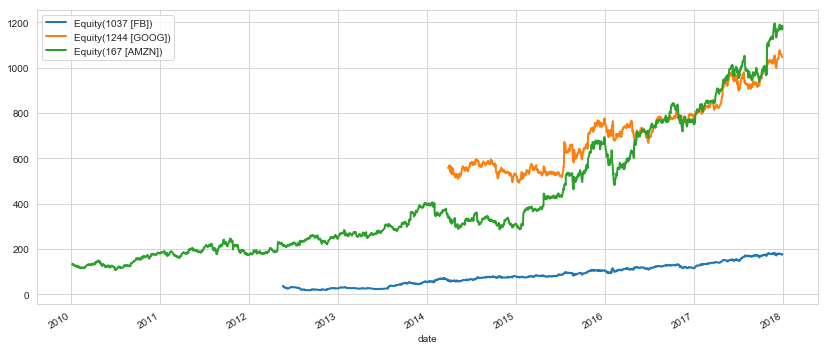

In [7]:
df = pd.read_csv('stock_data.csv')
df.date = pd.to_datetime(df.date)
df.set_index('date').groupby('asset').price.plot(lw=2, legend=True, figsize=(14, 6))

### Simple moving average strategy

The following code example illustrates a [Dual Moving Average Cross-Over Strategy](https://www.zipline.io/beginner-tutorial.html#access-to-previous-prices-using-history) to demonstrate zipline in action:

[2020-03-09 23:19:30.994805] INFO: zipline.finance.metrics.tracker: Simulated 1007 trading days
first open: 2014-01-02 14:31:00+00:00
last close: 2017-12-29 21:00:00+00:00


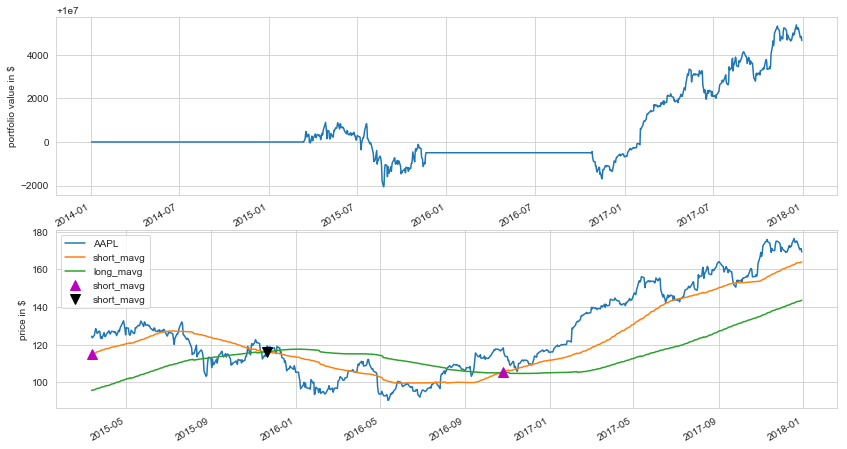

,AAPL,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,...,short_mavg,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2014-01-02 21:00:00+00:00,NaN,NaN,0.000000,NaN,-0.008862,NaN,NaN,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,1,[],0.0
2014-01-03 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.009192,0.095737,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,2,[],0.0
2014-01-06 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.011681,0.070343,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,3,[],0.0
2014-01-07 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.005670,0.097871,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,4,[],0.0
2014-01-08 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.005881,0.085181,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,5,[],0.0
2014-01-09 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.005535,0.076819,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,6,[],0.0
2014-01-10 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.003241,0.072741,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,7,[],0.0
2014-01-13 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.015776,0.095727,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,8,[],0.0
2014-01-14 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.005129,0.112236,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,9,[],0.0
2014-01-15 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,0.000011,0.109638,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,10,[],0.0


In [8]:
%%zipline --start 2014-1-1 --end 2018-1-1 -o dma.pickle
from zipline.api import order_target, record, symbol
import matplotlib.pyplot as plt

def initialize(context):
    context.i = 0
    context.asset = symbol('AAPL')


def handle_data(context, data):
    # Skip first 300 days to get full windows
    context.i += 1
    if context.i < 300:
        return

    # Compute averages
    # data.history() has to be called with the same params
    # from above and returns a pandas dataframe.
    short_mavg = data.history(context.asset, 'price', bar_count=100, frequency="1d").mean()
    long_mavg = data.history(context.asset, 'price', bar_count=300, frequency="1d").mean()

    # Trading logic
    if short_mavg > long_mavg:
        # order_target orders as many shares as needed to
        # achieve the desired number of shares.
        order_target(context.asset, 100)
    elif short_mavg < long_mavg:
        order_target(context.asset, 0)

    # Save values for later inspection
    record(AAPL=data.current(context.asset, 'price'),
           short_mavg=short_mavg,
           long_mavg=long_mavg)


def analyze(context, perf):
    fig, (ax1, ax2) = plt.subplots(nrows=2,figsize=(14, 8))
    perf.portfolio_value.plot(ax=ax1)
    ax1.set_ylabel('portfolio value in $')

    perf['AAPL'].plot(ax=ax2)
    perf[['short_mavg', 'long_mavg']].plot(ax=ax2)

    perf_trans = perf.ix[[t != [] for t in perf.transactions]]
    buys = perf_trans.ix[[t[0]['amount'] > 0 for t in perf_trans.transactions]]
    sells = perf_trans.ix[
        [t[0]['amount'] < 0 for t in perf_trans.transactions]]
    ax2.plot(buys.index, perf.short_mavg.ix[buys.index],
             '^', markersize=10, color='m')
    ax2.plot(sells.index, perf.short_mavg.ix[sells.index],
             'v', markersize=10, color='k')
    ax2.set_ylabel('price in $')
    plt.legend(loc=0)
    plt.show() 